# 월별 기온 fbporphet 1

In [ ]:
pip install fbprophet # 프로펫 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # 판다스
df = pd.read_csv('/content/전국월별평균기온73-20.csv', encoding='cp949') # 데이터 로드

In [ ]:
df.head()

,시간,평균기온
0,1973년01월,1.1
1,1973년02월,1.7
2,1973년03월,5.0
3,1973년04월,12.7
4,1973년05월,16.8


In [ ]:
df = df.rename(columns={'시간':'time', '평균기온':'C'})
df.tail() # 이름 바꿔줬다

,time,C
571,2020년08월,26.4
572,2020년09월,20.1
573,2020년10월,13.7
574,2020년11월,8.5
575,2020년12월,0.4


In [ ]:
df["time"] = df["time"].str.replace(pat=r'년', repl=r'-', regex=True) # 한글 지워줬다

In [ ]:
df["time"] = df["time"].str.replace(pat=r'월', repl=r'', regex=True) # 한글 지워줬다

In [ ]:
df.head()

,time,C
0,1973-01,1.1
1,1973-02,1.7
2,1973-03,5.0
3,1973-04,12.7
4,1973-05,16.8


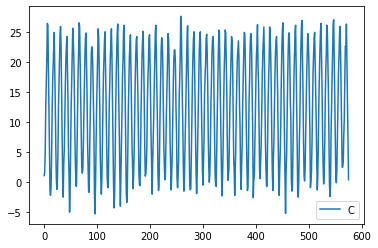

In [ ]:
from matplotlib import pyplot # 맷플롯립으로 온도를 그려봤다
df.plot()
pyplot.show() # 이쁘다

In [ ]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds']) # 프로펫은 변수 이름을 ds, y 로 맞춰줘야 한단다

In [ ]:
from fbprophet import Prophet # 프로펫
model = Prophet() # 이제부터 너는 모델이다

In [ ]:
model.fit(df) # 학습

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
last_1year = list() # 마지막 년도인 2020년의 12개의 달을 모으려고 한다 
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 남에 꺼 따라했다

# 미래나 과거를 예측해보기 전 학습으로 사용한 데이터를 잘 예측하는지 확인해야 한단다
# in_sample_forecast라고 한다는데, 즉 train_set을 잘 예측하냐 보는거다

In [ ]:
forecast = model.predict(last_1year) # 모은 2020년을 예측해보라 하고 forecast에 저장했다

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()) 
# 뭐가 많은데 4가지 컬럼만 보겠다

          ds       yhat  yhat_lower  yhat_upper
0 2020-01-01  -0.463059   -1.958516    1.008867
1 2020-02-01   1.050373   -0.376652    2.488372
2 2020-03-01   6.406095    4.891755    7.947668
3 2020-04-01  12.528015   11.152079   13.932102
4 2020-05-01  17.805471   16.479217   19.253792


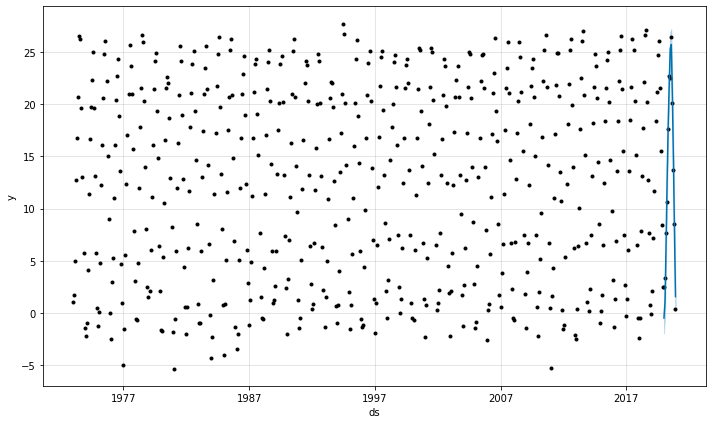

In [ ]:
model.plot(forecast)
pyplot.show()
# 프로펫은 내장함수 plot()가 있어서 좋다
# 검은점은 실제 데이터고 파란선이 예측값인데 엄청 잘 맞춘듯

In [ ]:
last_1year1 = list() # 이번엔 임의의 날짜 2021년 12달을 만든다
for i in range(1, 13):
  last_1year1.append(['2021-%02d' % i])
last_1year1 = pd.DataFrame(last_1year1, columns = ['ds'])
last_1year1['ds'] = pd.to_datetime(last_1year1['ds'])

# out_of_sample_forecast라고 한다는데, 그냥 21년 예측하는거다

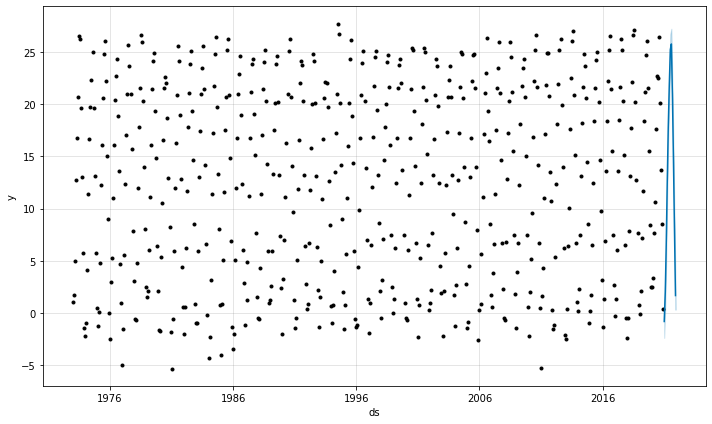

In [ ]:
forecast1 = model.predict(last_1year1)
model.plot(forecast1)
pyplot.show()
# 대충 잘 맞춘듯, 점이 많으니까 그냥 용과같아서 이쁘다

In [ ]:
# 이번에는 다르게 마지막 1년을 제외한 값으로 학습을 하고 마지막 1년을 예측한 뒤 
# 실제 마지막 1년과 비교하려고 한다 

# 마지막 12개월 제외시키기 
train = df.drop(df.index[-12:]) # train에서 뒤에 12개 제외
y_true = df['y'][-12:].values # 제외한 값은 y_true로 저장해둔다

# 모델 생성 후 학습
model = Prophet()
model.fit(train) # 12개가 빠진 train으로 학습

# 가상의 마지막 12개월 생성
last_1year = list()
for i in range(1, 13):
  last_1year.append(['2020-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds'] = pd.to_datetime(last_1year['ds']) # 실제 값이 들은게 아니다 !

# 예측, 비교하기 그리고 MAE를 살펴보기
forecast = model.predict(last_1year)
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 1.461


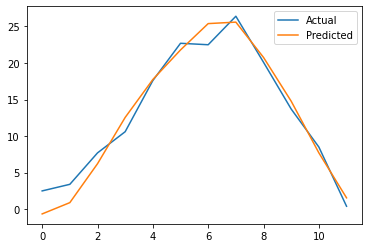

In [ ]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()
# MAE 1.461 잘 맞춘 듯 하다

In [ ]:
forecast1['yhat'] # 2021년 평균 온도 예측값

0     -0.797687
1      1.968911
2      6.443128
3     12.609492
4     17.840885
5     21.915864
6     25.216161
7     25.757059
8     20.919350
9     14.820509
10     8.007633
11     1.685159
Name: yhat, dtype: float64

In [ ]:
data2021 = [-1.1, 3.4, 8.7, 13.2, 16.6, 21.7, 26, 24.8, 21.3, 15.1, 8.3, 1.9]
# 실제 2021년 평균 온도 값
# https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

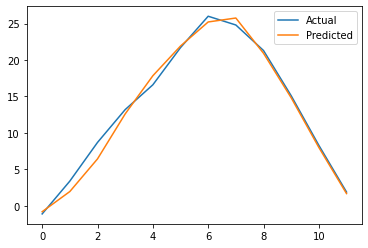

In [ ]:
pyplot.plot(data2021, label='Actual')
pyplot.plot(forecast1['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
last_1year2 = list() # 이번엔 임의의 날짜 2022년 12달을 만든다
for i in range(1, 13):
  last_1year2.append(['2022-%02d' % i])
last_1year2 = pd.DataFrame(last_1year2, columns = ['ds'])
last_1year2['ds'] = pd.to_datetime(last_1year2['ds'])

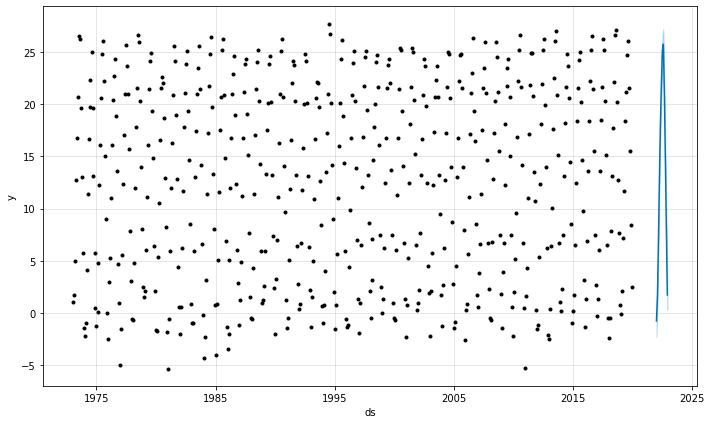

In [ ]:
forecast2 = model.predict(last_1year2)
model.plot(forecast2)
pyplot.show()

In [ ]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,12.908297,-2.293503,0.711780,12.907036,12.909369,-13.652407,-13.652407,-13.652407,-13.652407,-13.652407,-13.652407,0.0,0.0,0.0,-0.744109
1,2022-02-01,12.910644,0.252112,2.994313,12.909273,12.911802,-11.302443,-11.302443,-11.302443,-11.302443,-11.302443,-11.302443,0.0,0.0,0.0,1.608201
2,2022-03-01,12.912763,5.078431,7.995133,12.911312,12.913989,-6.491649,-6.491649,-6.491649,-6.491649,-6.491649,-6.491649,0.0,0.0,0.0,6.421113
3,2022-04-01,12.915109,11.219625,14.152941,12.913535,12.916431,-0.263975,-0.263975,-0.263975,-0.263975,-0.263975,-0.263975,0.0,0.0,0.0,12.651133
4,2022-05-01,12.917379,16.435392,19.220373,12.915711,12.918804,4.894677,4.894677,4.894677,4.894677,4.894677,4.894677,0.0,0.0,0.0,17.812056
5,2022-06-01,12.919725,20.449584,23.293454,12.917962,12.921237,8.930118,8.930118,8.930118,8.930118,8.930118,8.930118,0.0,0.0,0.0,21.849843
6,2022-07-01,12.921996,23.501537,26.545121,12.920090,12.923588,12.176322,12.176322,12.176322,12.176322,12.176322,12.176322,0.0,0.0,0.0,25.098318
7,2022-08-01,12.924342,24.296687,27.209022,12.922346,12.926023,12.812483,12.812483,12.812483,12.812483,12.812483,12.812483,0.0,0.0,0.0,25.736825
8,2022-09-01,12.926688,19.608484,22.388330,12.924604,12.928487,8.051357,8.051357,8.051357,8.051357,8.051357,8.051357,0.0,0.0,0.0,20.978045
9,2022-10-01,12.928958,13.443695,16.264705,12.926714,12.930860,1.859601,1.859601,1.859601,1.859601,1.859601,1.859601,0.0,0.0,0.0,14.788559


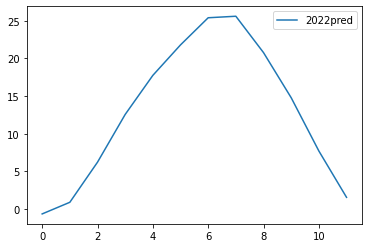

In [ ]:
pyplot.plot(forecast['yhat'], label='2022pred')
pyplot.legend()
pyplot.show()

# 2023년 예측

In [ ]:
last_1year3 = list() # 이번엔 임의의 날짜 2022년 12달을 만든다
for i in range(1, 13):
  last_1year3.append(['2023-%02d' % i])
last_1year3 = pd.DataFrame(last_1year3, columns = ['ds'])
last_1year3['ds'] = pd.to_datetime(last_1year3['ds'])

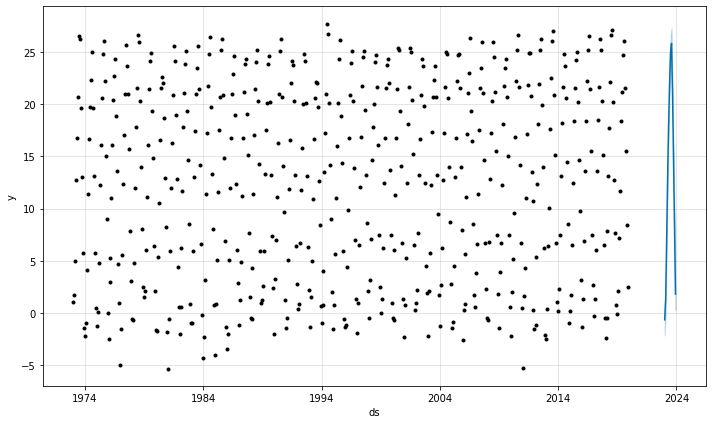

In [ ]:
forecast3 = model.predict(last_1year3)
model.plot(forecast3)
pyplot.show()

In [ ]:
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,12.935921,-2.151669,0.835070,12.933373,12.938226,-13.575235,-13.575235,-13.575235,-13.575235,-13.575235,-13.575235,0.0,0.0,0.0,-0.639314
1,2023-02-01,12.938267,-0.243869,2.758175,12.935591,12.940681,-11.631537,-11.631537,-11.631537,-11.631537,-11.631537,-11.631537,0.0,0.0,0.0,1.306730
2,2023-03-01,12.940386,5.083053,8.029250,12.937574,12.942919,-6.410654,-6.410654,-6.410654,-6.410654,-6.410654,-6.410654,0.0,0.0,0.0,6.529732
3,2023-04-01,12.942732,11.224091,14.146040,12.939812,12.945388,-0.243561,-0.243561,-0.243561,-0.243561,-0.243561,-0.243561,0.0,0.0,0.0,12.699172
4,2023-05-01,12.945003,16.472398,19.388856,12.942020,12.947828,4.898260,4.898260,4.898260,4.898260,4.898260,4.898260,0.0,0.0,0.0,17.843263
5,2023-06-01,12.947349,20.481969,23.413200,12.944261,12.950329,8.927628,8.927628,8.927628,8.927628,8.927628,8.927628,0.0,0.0,0.0,21.874977
6,2023-07-01,12.949619,23.524088,26.460915,12.946426,12.952772,12.000444,12.000444,12.000444,12.000444,12.000444,12.000444,0.0,0.0,0.0,24.950063
7,2023-08-01,12.951965,24.380284,27.287078,12.948649,12.955259,12.859039,12.859039,12.859039,12.859039,12.859039,12.859039,0.0,0.0,0.0,25.811005
8,2023-09-01,12.954312,19.628549,22.426269,12.950845,12.957761,8.130532,8.130532,8.130532,8.130532,8.130532,8.130532,0.0,0.0,0.0,21.084843
9,2023-10-01,12.956582,13.451829,16.216394,12.952950,12.960132,1.841482,1.841482,1.841482,1.841482,1.841482,1.841482,0.0,0.0,0.0,14.798064


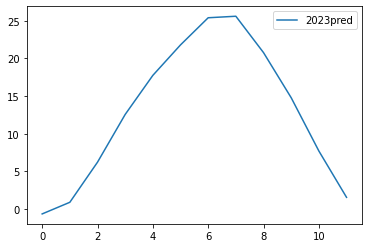

In [ ]:
pyplot.plot(forecast['yhat'], label='2023pred')
pyplot.legend()
pyplot.show()